In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [12]:
from fastai.metrics import *
from fastai.basics import *
from fastai.vision import *
from fastai
from pathlib import Path

In [3]:
PATH = "/home/paperspace/classifier_data"

In [11]:
data = ImageDataBunch.from_folder(
    PATH, 
    valid_pct=0.2, 
    bs=64, 
    size=224, 
    ds_tfms=get_transforms()).normalize(imagenet_stats)

In [14]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [16]:
data.c

4

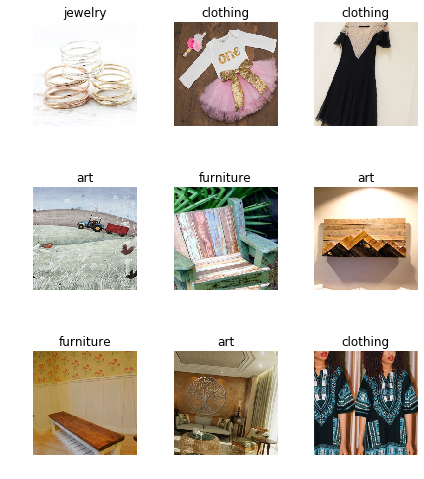

In [17]:
data.show_batch(rows=3, figsize=(6,7))

In [18]:
data.classes

['art', 'clothing', 'furniture', 'jewelry']

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


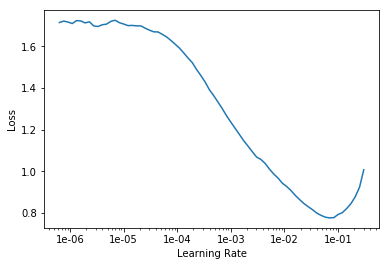

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy
1,0.577624,0.161015,0.954683
2,0.341631,0.213401,0.939577
3,0.229269,0.139320,0.957704
4,0.163421,0.125970,0.969788


In [22]:
learn.save('stage1')

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [25]:
learn.unfreeze()

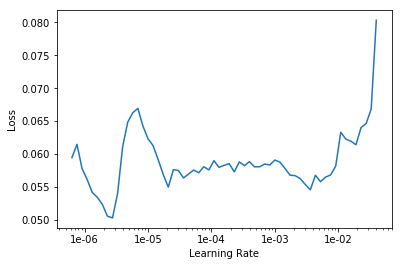

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(4, slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy
1,0.054286,0.125822,0.960725
2,0.068629,0.146969,0.963746
3,0.057801,0.155469,0.963746
4,0.047278,0.151596,0.960725


In [28]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (1324 items)
[Category jewelry, Category jewelry, Category jewelry, Category jewelry, Category jewelry]...
Path: /home/paperspace/classifier_data
x: ImageItemList (1324 items)
[Image (3, 570, 570), Image (3, 640, 640), Image (3, 767, 767), Image (3, 796, 700), Image (3, 610, 422)]...
Path: /home/paperspace/classifier_data;

Valid: LabelList
y: CategoryList (331 items)
[Category clothing, Category furniture, Category clothing, Category jewelry, Category furniture]...
Path: /home/paperspace/classifier_data
x: ImageItemList (331 items)
[Image (3, 550, 400), Image (3, 423, 564), Image (3, 813, 1024), Image (3, 585, 640), Image (3, 270, 340)]...
Path: /home/paperspace/classifier_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)


In [29]:
learn.fit_one_cycle(4, 1e-5)

epoch,train_loss,valid_loss,accuracy
1,0.073733,0.123475,0.966767
2,0.056234,0.118877,0.972810
3,0.050691,0.118382,0.972810
4,0.046225,0.118663,0.969788


In [30]:
interp = ClassificationInterpretation.from_learner(learn)

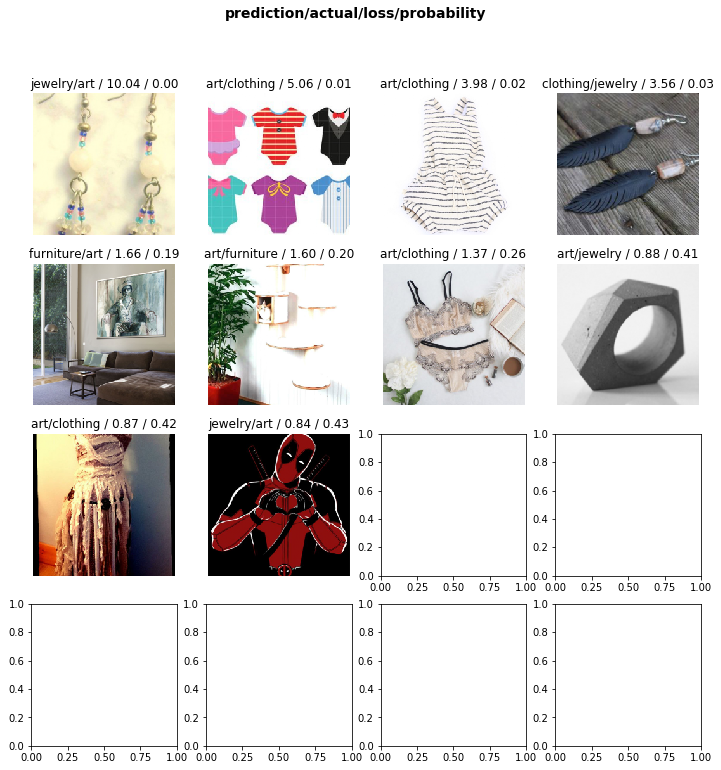

In [32]:
interp.plot_top_losses(10)

In [33]:
interp.most_confused()

[('clothing', 'art', 4), ('art', 'jewelry', 2)]

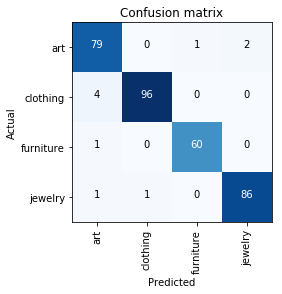

In [34]:
interp.plot_confusion_matrix()